In [218]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from time import time
import pydotplus
from sklearn import tree
from IPython.display import Image
import scikitplot as skplt
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [219]:
df = pd.read_csv("/home/damessina/Desktop/df_pulito.csv")

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25000 non-null  int64 
 1   track_bit_rate            25000 non-null  int64 
 2   track_date_created        25000 non-null  int64 
 3   track_duration            25000 non-null  int64 
 4   track_favorites           25000 non-null  int64 
 5   track_listens             25000 non-null  int64 
 6   track_tags                25000 non-null  int64 
 7   album_comments            25000 non-null  int64 
 8   album_date_released       25000 non-null  int64 
 9   album_favorites           25000 non-null  int64 
 10  album_information         25000 non-null  int64 
 11  album_listens             25000 non-null  int64 
 12  album_tracks              25000 non-null  int64 
 13  artist_wikipedia_page     25000 non-null  object
 14  artist_website        

In [221]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [222]:
df_split1 = df[df['split']=='training']
df_split2 = df[df['split']=='validation']
con = [df_split1, df_split2]
df_train = pd.concat(con, ignore_index=True)
df_train.drop(columns=['split'], inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [223]:
attributes_tr = [col for col in df_train.columns if col != 'artist_wikipedia_page']
X_train = df_train[attributes_tr].values
y_train = df_train['artist_wikipedia_page']

In [224]:
df_test = df[df['split']=='test']
df_test.drop(columns=['split'], inplace=True)
df_test.reset_index(drop=True, inplace=True)

/home/damessina/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [225]:
attributes_te = [col for col in df_test.columns if col != 'artist_wikipedia_page']
X_test = df_test[attributes_te].values
y_test = df_test['artist_wikipedia_page']

## Test con una random forest molto basic

In [133]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=100, 
                             min_samples_leaf=20, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9358725223474543
F1-score [0.96679412 0.06779661]
              precision    recall  f1-score   support

          No       0.94      0.99      0.97      2418
         Yes       0.27      0.04      0.07       155

    accuracy                           0.94      2573
   macro avg       0.61      0.52      0.52      2573
weighted avg       0.90      0.94      0.91      2573



In [134]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=40, min_samples_split=100, 
                             min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features=None, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9498639720171007
F1-score [0.9734404  0.55363322]
              precision    recall  f1-score   support

          No       0.97      0.98      0.97      2418
         Yes       0.60      0.52      0.55       155

    accuracy                           0.95      2573
   macro avg       0.78      0.75      0.76      2573
weighted avg       0.95      0.95      0.95      2573



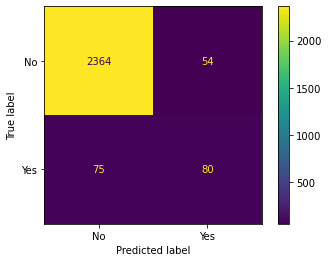

In [135]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

### Features importance

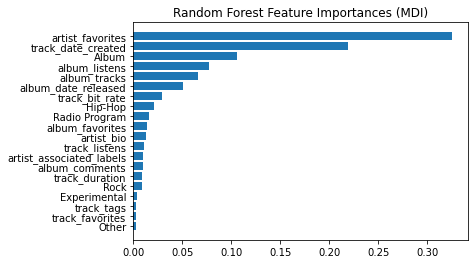

In [136]:
nbr_features = 20

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(attributes_te)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [139]:
from sklearn.inspection import permutation_importance

In [140]:
result = permutation_importance(clf, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2)

In [147]:
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{attributes_te[i]:<6}"
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")

artist_favorites0.018 +/- 0.003
Album 0.012 +/- 0.002
album_date_released0.008 +/- 0.001
track_date_created0.007 +/- 0.001
album_listens0.003 +/- 0.001


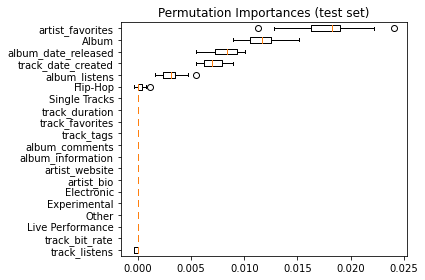

In [142]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(attributes_te)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

### Roc Curve

In [137]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test_bin= lb.transform(y_test)
by_pred_bin = lb.transform(y_pred)
by_test = np.hstack((by_test_bin, 1 - by_test_bin))
by_pred = np.hstack((by_pred_bin, 1 - by_pred_bin))

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

array([0.74689826, 0.74689826])

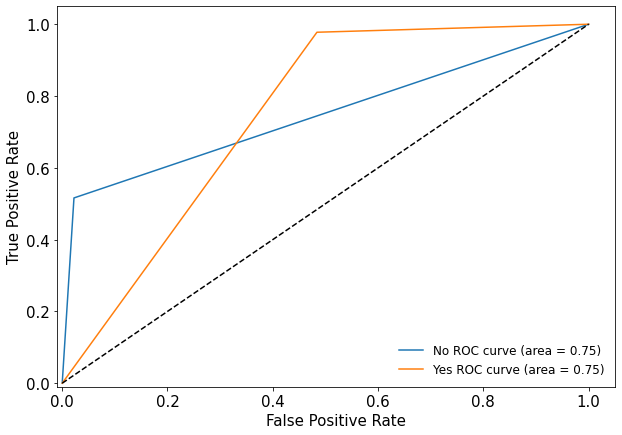

In [138]:
plt.figure(figsize=(10, 7))
for i in range(2):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="lower right", fontsize=12, frameon=False)
plt.show()

### Plotto degli alberi della random forest a caso per vedere quanto siano diversi fra loro

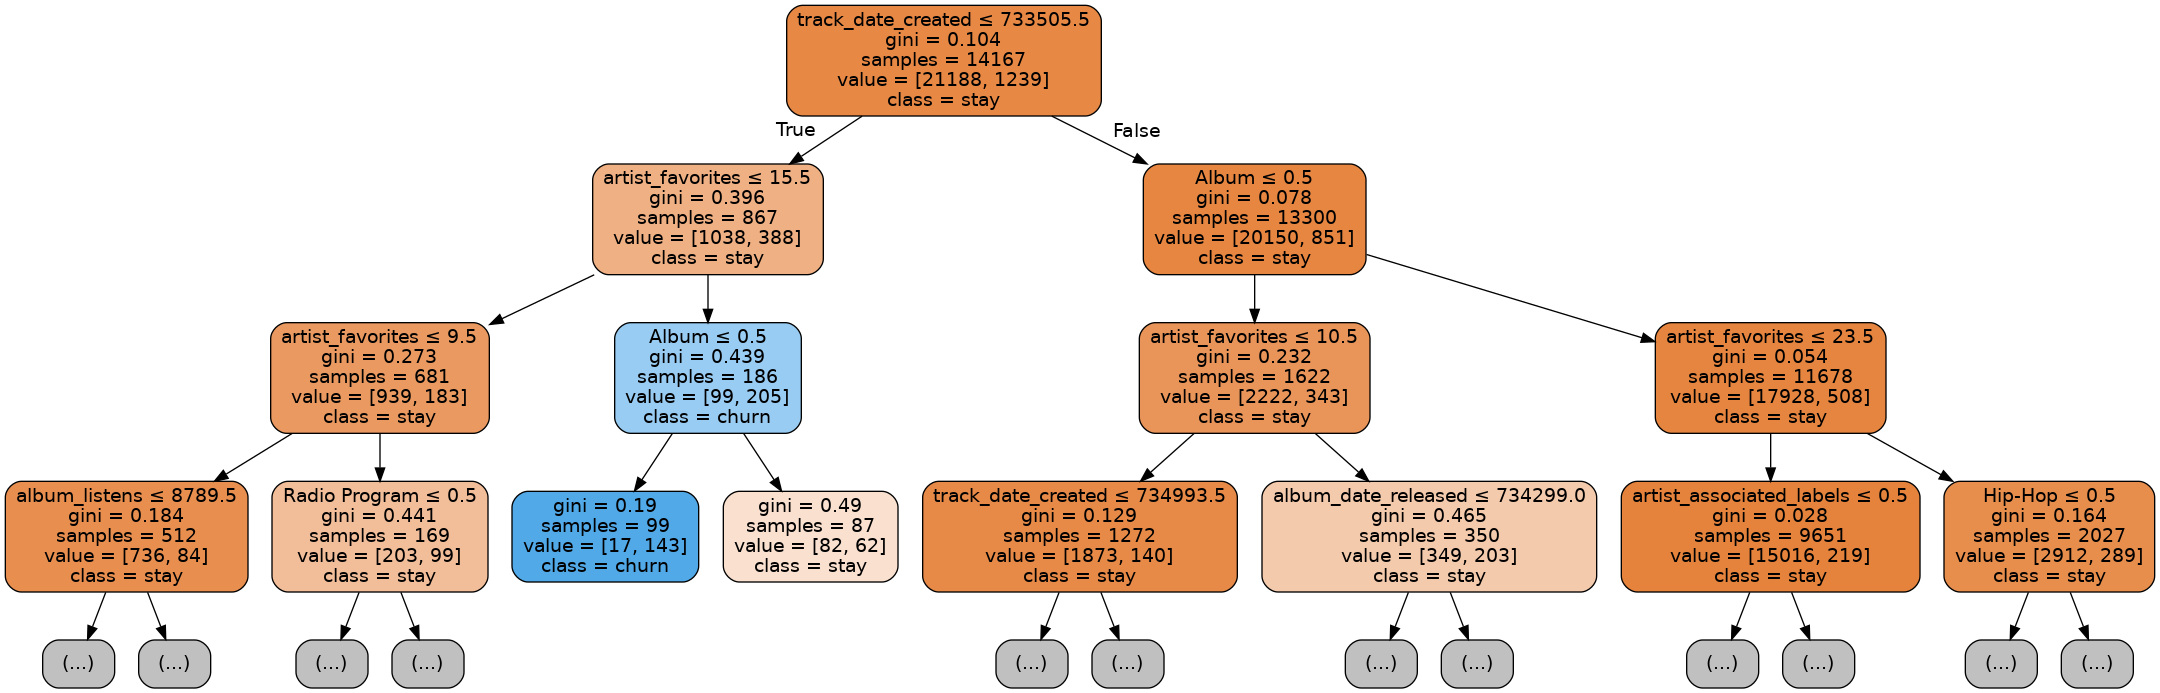

In [153]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=attributes_te, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

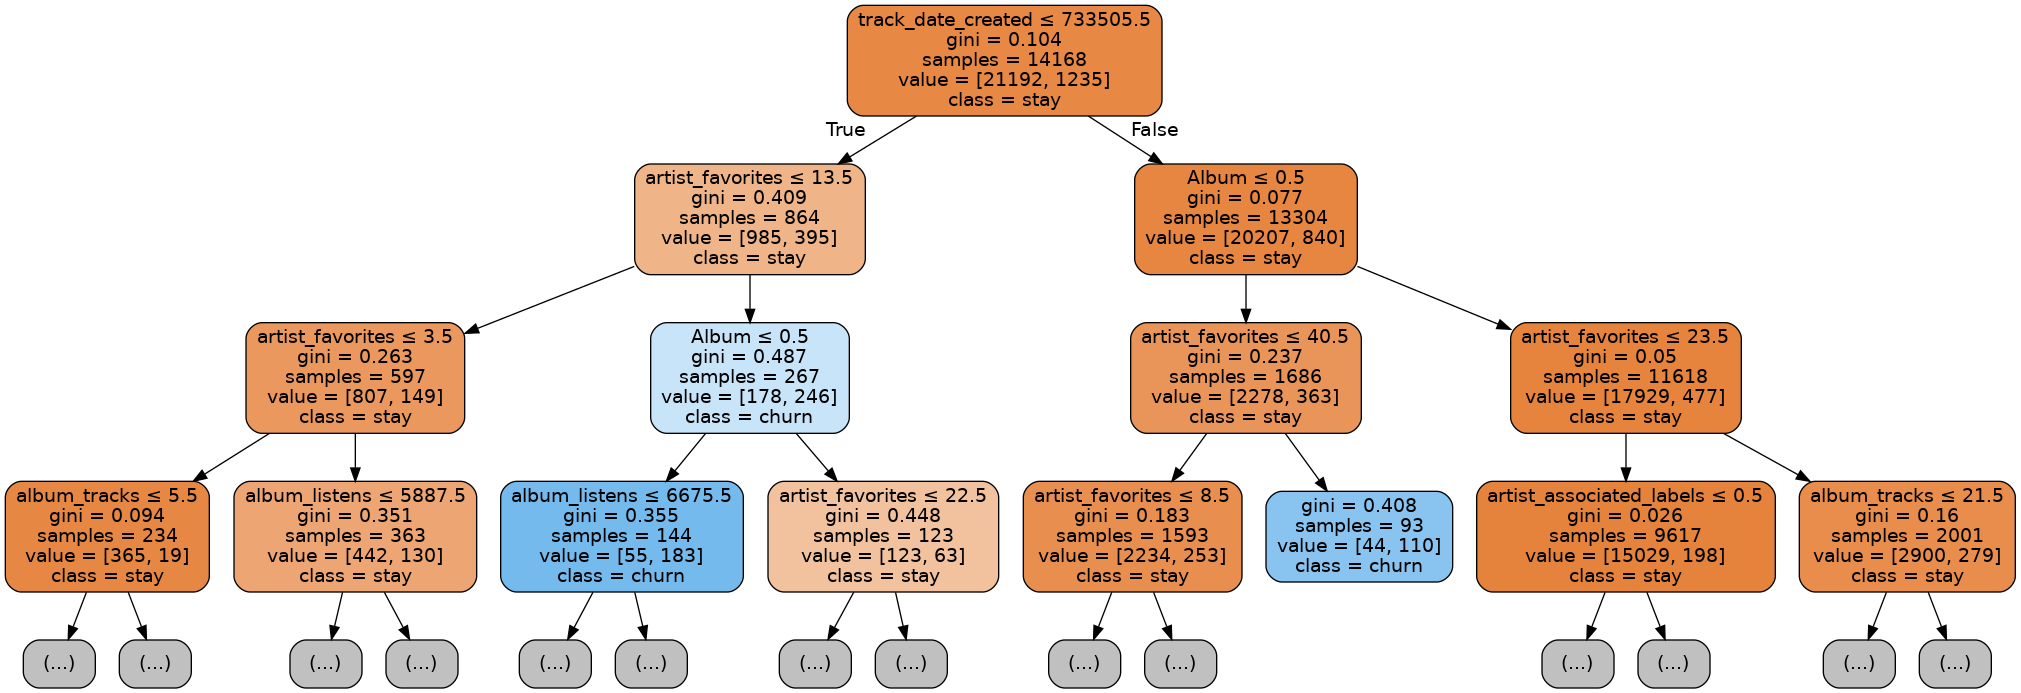

In [154]:
dot_data = tree.export_graphviz(clf.estimators_[99], out_file=None,  
                                feature_names=attributes_te, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [157]:
df_cross = df

#df_cross.drop(columns=['split'], inplace=True)

attributes = [col for col in df.columns if col != 'artist_wikipedia_page']
X = df_cross[attributes].values
y = df_cross['artist_wikipedia_page']

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='recall_macro')
print('Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8373 (+/- 0.52)
F1-score: 0.5116 (+/- 0.31)
Recall: 0.5459 (+/- 0.07)


In [158]:
param_list = {'n_estimators' : [30, 50, 75, 100, 125, 150, 200, 250],
              'criterion' : ('gini', 'entropy'),
              'max_depth': [None] + list(np.arange(10, 40)),
              'min_samples_split': [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

In [159]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [160]:
report(random_search.cv_results_, n_top=1)

Model with rank: 1
Mean validation score: 0.891 (std: 0.070)
Parameters: {'n_estimators': 250, 'min_samples_split': 200, 'min_samples_leaf': 5, 'max_depth': 23, 'criterion': 'gini'}



### Si fanno altre prove modificando i parametri seguendo le indicazioni della random search

In [161]:
clf = RandomForestClassifier(n_estimators=250, criterion='gini', max_depth=23, min_samples_split=200, 
                             min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.950252623396813
F1-score [0.97365171 0.55555556]
              precision    recall  f1-score   support

          No       0.97      0.98      0.97      2418
         Yes       0.60      0.52      0.56       155

    accuracy                           0.95      2573
   macro avg       0.79      0.75      0.76      2573
weighted avg       0.95      0.95      0.95      2573



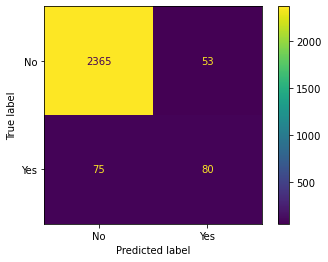

In [162]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

### Si prov a a modificare il classificatore facendo vari tentativi con vari base estimators

In [166]:
clf = BaggingClassifier(base_estimator=None, n_estimators=250)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9347065682083171
F1-score [0.96540362 0.42068966]
              precision    recall  f1-score   support

          No       0.96      0.97      0.97      2418
         Yes       0.45      0.39      0.42       155

    accuracy                           0.93      2573
   macro avg       0.71      0.68      0.69      2573
weighted avg       0.93      0.93      0.93      2573



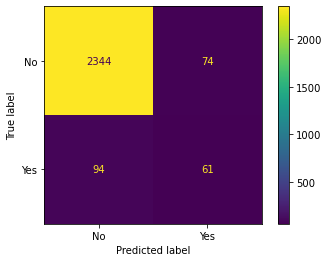

In [167]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [171]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9366498251068791
F1-score [0.96642636 0.43986254]
              precision    recall  f1-score   support

          No       0.96      0.97      0.97      2418
         Yes       0.47      0.41      0.44       155

    accuracy                           0.94      2573
   macro avg       0.72      0.69      0.70      2573
weighted avg       0.93      0.94      0.93      2573



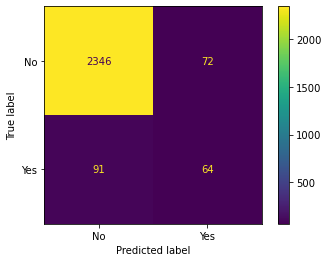

In [172]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

### Si prova anche a standardizzare i dati per vedere se le prestazioni in questo modo migliorano

In [180]:
scaler = StandardScaler()
X_tr_st = scaler.fit_transform(X_train)
X_te_st = scaler.transform(X_test)

In [181]:
clf = BaggingClassifier(base_estimator=SVC(C=210, gamma='auto'), n_estimators=10)
clf.fit(X_tr_st, y_train)

y_pred = clf.predict(X_te_st)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9028371550719005
F1-score [0.94804655 0.25149701]
              precision    recall  f1-score   support

          No       0.95      0.94      0.95      2418
         Yes       0.23      0.27      0.25       155

    accuracy                           0.90      2573
   macro avg       0.59      0.61      0.60      2573
weighted avg       0.91      0.90      0.91      2573



In [182]:
clf = BaggingClassifier(base_estimator=SVC(C=210, gamma='auto'), n_estimators=20)
clf.fit(X_tr_st, y_train)

y_pred = clf.predict(X_te_st)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8985619898950641
F1-score [0.94565896 0.23906706]
              precision    recall  f1-score   support

          No       0.95      0.94      0.95      2418
         Yes       0.22      0.26      0.24       155

    accuracy                           0.90      2573
   macro avg       0.59      0.60      0.59      2573
weighted avg       0.91      0.90      0.90      2573



In [183]:
clf = BaggingClassifier(base_estimator=SVC(C=210, gamma='auto'), n_estimators=15)
clf.fit(X_tr_st, y_train)

y_pred = clf.predict(X_te_st)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9016712009327633
F1-score [0.94739031 0.24925816]
              precision    recall  f1-score   support

          No       0.95      0.94      0.95      2418
         Yes       0.23      0.27      0.25       155

    accuracy                           0.90      2573
   macro avg       0.59      0.61      0.60      2573
weighted avg       0.91      0.90      0.91      2573



In [184]:
clf = BaggingClassifier(base_estimator=SVC(C=210, gamma='auto'), n_estimators=5)
clf.fit(X_tr_st, y_train)

y_pred = clf.predict(X_te_st)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8938981733385154
F1-score [0.94261089 0.29820051]
              precision    recall  f1-score   support

          No       0.96      0.93      0.94      2418
         Yes       0.25      0.37      0.30       155

    accuracy                           0.89      2573
   macro avg       0.60      0.65      0.62      2573
weighted avg       0.92      0.89      0.90      2573



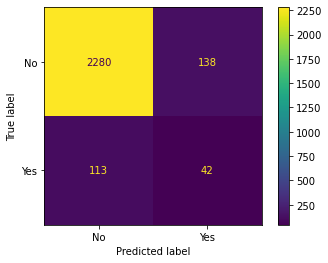

In [189]:
predict = clf.predict(X_te_st)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

### si prova anche ad utilizzare un rule based classifier come base estimator per l'ensamble

In [190]:
import wittgenstein as lw

In [191]:
clf = BaggingClassifier(base_estimator=lw.RIPPER(), n_estimators=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

base.py: .predict_proba: RuntimeWarning: 
Some examples lacked any rule with sufficient sample size to predict_proba: [36, 39, 41, 43, 45, 47, 65, 66, 67, 68, 69, 70, 81, 82, 83, 84, 85, 86, 87, 88, 191, 233, 502, 503, 504, 505, 506, 507, 508, 509, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 930, 931, 932, 933, 934, 935, 936, 962, 963, 964, 965, 966, 967, 1007, 1008, 1009, 1010, 1011, 1013, 1014, 1015, 1023, 1024, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1035, 1213, 1214, 1215, 1347, 1402, 1580, 1581, 1582, 1583, 1584, 2019, 2021]
 Consider running recalibrate_proba with smaller param min_samples, or set require_min_samples=False

base.py: .predict_proba: RuntimeWarning: 
Some examples lacked any rule with sufficient sample size to predict_proba: [1, 10, 11, 13, 16, 19, 22, 23, 24, 26, 30, 31, 37, 38, 40, 42, 44, 46, 48, 49, 100, 101, 102, 103, 104, 105, 106, 107, 108, 130, 147, 148, 149, 150, 151, 152, 154, 157, 158, 159, 160, 162, 164, 166, 167, 168, 169, 171, 174, 176, 177, 1

Accuracy 0.9397590361445783
F1-score [0.96884422 0.09356725]
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      2418
         Yes       0.50      0.05      0.09       155

    accuracy                           0.94      2573
   macro avg       0.72      0.52      0.53      2573
weighted avg       0.92      0.94      0.92      2573



base.py: .predict_proba: RuntimeWarning: 
Some examples lacked any rule with sufficient sample size to predict_proba: [1, 11, 12, 13, 15, 17, 20, 21, 23, 26, 27, 28, 31, 36, 39, 41, 43, 45, 47, 81, 82, 83, 84, 85, 86, 87, 88, 166, 167, 168, 169, 170, 171, 193, 288, 296, 340, 473, 502, 503, 504, 505, 506, 507, 508, 509, 573, 574, 575, 576, 577, 578, 579, 580, 661, 930, 932, 933, 934, 936, 1007, 1008, 1009, 1010, 1011, 1013, 1014, 1015, 1023, 1024, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1347, 1402, 1964]
 Consider running recalibrate_proba with smaller param min_samples, or set require_min_samples=False



### Ensamble di random forest

In [192]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9331519626894675
F1-score [0.96515397 0.18095238]
              precision    recall  f1-score   support

          No       0.95      0.99      0.97      2418
         Yes       0.35      0.12      0.18       155

    accuracy                           0.93      2573
   macro avg       0.65      0.55      0.57      2573
weighted avg       0.91      0.93      0.92      2573



In [193]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=250, 
                                                              criterion='gini', max_depth=23, 
                                                              min_samples_split=200,min_samples_leaf=5, 
                                                              max_features=None), 
                        n_estimators=100, 
                        random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9498639720171007
F1-score [0.97342945 0.55670103]
              precision    recall  f1-score   support

          No       0.97      0.98      0.97      2418
         Yes       0.60      0.52      0.56       155

    accuracy                           0.95      2573
   macro avg       0.78      0.75      0.77      2573
weighted avg       0.95      0.95      0.95      2573



### Ensamble di Decision Tree

In [199]:
from sklearn.tree import DecisionTreeClassifier 

In [200]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', 
                                                                max_depth=23, 
                                                                min_samples_split=240, 
                                                                min_samples_leaf=89), 
                        n_estimators=100, 
                        random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9452001554605519
F1-score [0.97113613 0.45977011]
              precision    recall  f1-score   support

          No       0.96      0.98      0.97      2418
         Yes       0.57      0.39      0.46       155

    accuracy                           0.95      2573
   macro avg       0.76      0.68      0.72      2573
weighted avg       0.94      0.95      0.94      2573



In [201]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', 
                                                                max_depth=23, 
                                                                min_samples_split=240, 
                                                                min_samples_leaf=89), 
                        n_estimators=200, 
                        random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9413136416634279
F1-score [0.96924017 0.3628692 ]
              precision    recall  f1-score   support

          No       0.96      0.98      0.97      2418
         Yes       0.52      0.28      0.36       155

    accuracy                           0.94      2573
   macro avg       0.74      0.63      0.67      2573
weighted avg       0.93      0.94      0.93      2573



### Si cambia algoritmo: Adaboost

In [197]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9331519626894675
F1-score [0.96508323 0.21818182]
              precision    recall  f1-score   support

          No       0.95      0.98      0.97      2418
         Yes       0.37      0.15      0.22       155

    accuracy                           0.93      2573
   macro avg       0.66      0.57      0.59      2573
weighted avg       0.91      0.93      0.92      2573



In [202]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100,
                                                                criterion='gini',
                                                                max_depth=23, 
                                                                min_samples_split=200,
                                                                min_samples_leaf=5, 
                                                                max_features=None),
                         n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9440342013214147
F1-score [0.97089733 0.27272727]
              precision    recall  f1-score   support

          No       0.95      0.99      0.97      2418
         Yes       0.63      0.17      0.27       155

    accuracy                           0.94      2573
   macro avg       0.79      0.58      0.62      2573
weighted avg       0.93      0.94      0.93      2573



In [206]:
clf = AdaBoostClassifier(base_estimator=SVC(C=210, gamma='auto'), n_estimators=10, algorithm='SAMME', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9397590361445783
F1-score [0.9689441 0.       ]
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      2418
         Yes       0.00      0.00      0.00       155

    accuracy                           0.94      2573
   macro avg       0.47      0.50      0.48      2573
weighted avg       0.88      0.94      0.91      2573



/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Si testa di nuovo il modello che ha avuto le prestazioni migliori

In [226]:
clf = RandomForestClassifier(n_estimators=250, criterion='gini', max_depth=23, min_samples_split=200, 
                             min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.950252623396813
F1-score [0.97365171 0.55555556]
              precision    recall  f1-score   support

          No       0.97      0.98      0.97      2418
         Yes       0.60      0.52      0.56       155

    accuracy                           0.95      2573
   macro avg       0.79      0.75      0.76      2573
weighted avg       0.95      0.95      0.95      2573



In [229]:
df_cross = df
# modifico i valori Yes e No con 1 e 0 perché sennò il modello non riesce a fittare
#df_cross.replace({'artist_wikipedia_page' : {'Yes' : 1, 'No' : 0}}, inplace = True)
df_cross.drop(columns=['split'], inplace = True)
attributes = [col for col in df.columns if col != 'artist_wikipedia_page']
X = df_cross[attributes].values
y = df_cross['artist_wikipedia_page']

scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='recall_macro')
print('Recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.5537 (+/- 0.72)
F1-score: 0.3758 (+/- 0.44)
Recall: 0.4382 (+/- 0.31)


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

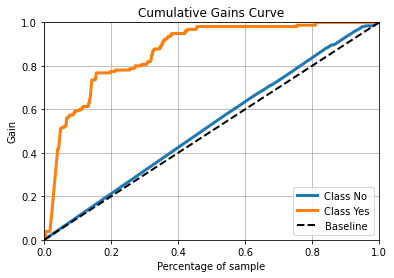

In [231]:
predicted_probabilities = clf.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

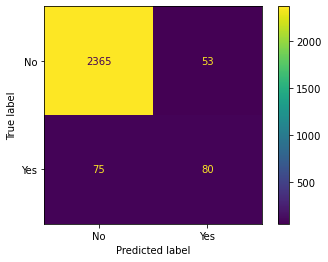

In [232]:
predict = clf.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()